In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical ## specific  one I wanna use
from tensorflow.keras import utils
#from tensorflow.keras.layers import Input, Dense, Dropout  # Specific ones I wanna use, can just import whole module
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
import h5py
#import tables
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.utils.class_weight import compute_class_weight


In [2]:
x=1
y=3
x+y



4

In [3]:
# Load the HDF5 file
with h5py.File('DF_event_based-Copy1.h5', 'r') as hf:
    # Access the dataset by name and load it into a pandas dataframe
    df_total = pd.DataFrame(hf['dataset_name'][:])

with h5py.File('4_event_types_weights-Copy1.h5', 'r') as f:
    df_weights = f['array'][:]

In [4]:
with h5py.File('run1_ROC_data.h5', 'r') as hf:
    roc_df_run1 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run2_ROC_data.h5', 'r') as hf:
    roc_df_run2 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run3_ROC_data.h5', 'r') as hf:
    roc_df_run3 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run4_ROC_data.h5', 'r') as hf:
    roc_df_run4 = pd.DataFrame(hf['df'][:])

with h5py.File('run5_ROC_data.h5', 'r') as hf:
    roc_df_run5 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run6_ROC_data.h5', 'r') as hf:
    roc_df_run6 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run7_ROC_data.h5', 'r') as hf:
    roc_df_run7 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run8_ROC_data.h5', 'r') as hf:
    roc_df_run8 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run9_ROC_data.h5', 'r') as hf:
    roc_df_run9 = pd.DataFrame(hf['df'][:])
    
with h5py.File('run10_ROC_data.h5', 'r') as hf:
    roc_df_run10 = pd.DataFrame(hf['df'][:])
    

In [5]:
cols = ['True_Val', 'Predicted', 'Round Prediction']

roc_df_run1 = roc_df_run1.rename(columns=dict(zip(roc_df_run1.columns, cols)))
roc_df_run2 = roc_df_run2.rename(columns=dict(zip(roc_df_run2.columns, cols)))
roc_df_run3 = roc_df_run3.rename(columns=dict(zip(roc_df_run3.columns, cols)))
roc_df_run4 = roc_df_run4.rename(columns=dict(zip(roc_df_run4.columns, cols)))
roc_df_run5 = roc_df_run5.rename(columns=dict(zip(roc_df_run5.columns, cols)))
roc_df_run6 = roc_df_run6.rename(columns=dict(zip(roc_df_run6.columns, cols)))
roc_df_run7 = roc_df_run7.rename(columns=dict(zip(roc_df_run7.columns, cols)))
roc_df_run8 = roc_df_run8.rename(columns=dict(zip(roc_df_run8.columns, cols)))
roc_df_run9 = roc_df_run9.rename(columns=dict(zip(roc_df_run9.columns, cols)))
roc_df_run10 = roc_df_run10.rename(columns=dict(zip(roc_df_run10.columns, cols)))

roc_df_run3


,True_Val,Predicted,Round Prediction
0,0.0,0.534102,1.0
1,0.0,0.312397,0.0
2,0.0,0.136496,0.0
3,0.0,0.258983,0.0
4,0.0,0.167892,0.0
...,...,...,...
176215,1.0,0.482203,0.0
176216,1.0,0.785123,1.0
176217,1.0,0.513268,1.0
176218,1.0,0.682414,1.0


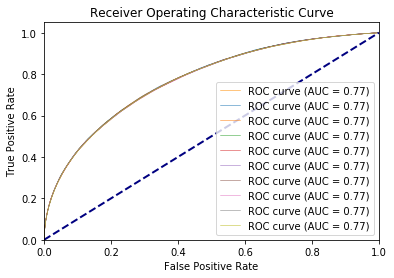

[0.77275563 0.77417286 0.77300698 0.77263598 0.77196206 0.77173389
 0.77297234 0.77116676 0.77213619 0.77122757]


In [6]:
#plot ROC curves

y_true1 = roc_df_run1['True_Val']
y_score1 = roc_df_run1['Predicted']

y_true2 = roc_df_run2['True_Val']
y_score2 = roc_df_run2['Predicted']

y_true3 = roc_df_run3['True_Val']
y_score3 = roc_df_run3['Predicted']

y_true4 = roc_df_run4['True_Val']
y_score4 = roc_df_run4['Predicted']


y_true5 = roc_df_run5['True_Val']
y_score5 = roc_df_run5['Predicted']


y_true6 = roc_df_run6['True_Val']
y_score6 = roc_df_run6['Predicted']


y_true7 = roc_df_run7['True_Val']
y_score7 = roc_df_run7['Predicted']


y_true8 = roc_df_run8['True_Val']
y_score8 = roc_df_run8['Predicted']


y_true9 = roc_df_run9['True_Val']
y_score9 = roc_df_run9['Predicted']


y_true10 = roc_df_run10['True_Val']
y_score10 = roc_df_run10['Predicted']




# calculate the false positive rate and true positive rate
fpr1, tpr1, thresholds1 = roc_curve(y_true1, y_score1)
fpr2, tpr2, thresholds2 = roc_curve(y_true2, y_score2)
fpr3, tpr3, thresholds3 = roc_curve(y_true3, y_score3)
fpr4, tpr4, thresholds4 = roc_curve(y_true4, y_score4)
fpr5, tpr5, thresholds5 = roc_curve(y_true5, y_score5)
fpr6, tpr6, thresholds6 = roc_curve(y_true6, y_score6)
fpr7, tpr7, thresholds7 = roc_curve(y_true7, y_score7)
fpr8, tpr8, thresholds8 = roc_curve(y_true8, y_score8)
fpr9, tpr9, thresholds9 = roc_curve(y_true9, y_score9)
fpr10, tpr10, thresholds10 = roc_curve(y_true10, y_score10)


# calculate the area under the ROC curve
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)
roc_auc7 = auc(fpr7, tpr7)
roc_auc8 = auc(fpr8, tpr8)
roc_auc9 = auc(fpr9, tpr9)
roc_auc10 = auc(fpr10, tpr10)




# plot the ROC curve
plt.plot(fpr1, tpr1, color='darkorange', lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc6)
plt.plot(fpr7, tpr7, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc7)
plt.plot(fpr8, tpr8, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc8)
plt.plot(fpr9, tpr9, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc9)
plt.plot(fpr10, tpr10, lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc10)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


roc_auc = np.array((roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6,roc_auc7,roc_auc8,roc_auc9,roc_auc10))
print(roc_auc)  #79%


# 3  0.7686764

In [7]:
FNN_ROC = {'fpr': fpr1, 'tpr': tpr1}
FNN_ROC_df = pd.DataFrame(FNN_ROC)


# Save the DataFrame to an HDF5 file
with h5py.File('FNN_ROC_df.h5', 'w') as hf:
    hf.create_dataset('df', data=FNN_ROC_df)

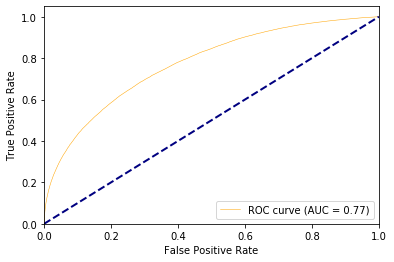

In [8]:
# plot the ROC curve
plt.plot(fpr1, tpr1, color='orange', lw=0.5, label='ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
print(f'The mean AUC is {np.mean(roc_auc):.4f}')
print(f'The standard deviation on AUC is {np.std(roc_auc):.4f}')

The mean AUC is 0.7724
The standard deviation on AUC is 0.0009


Text(0.5, 1.0, 'Boxplot of ROC AUC')

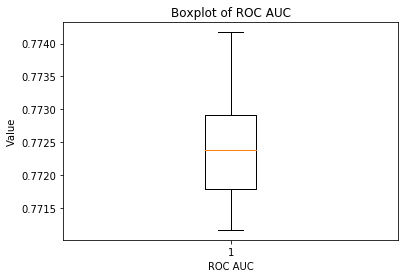

In [10]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(roc_auc)

# set axis labels and title
ax.set_xlabel('ROC AUC')
ax.set_ylabel('Value')
ax.set_title('Boxplot of ROC AUC')


(0.7685, 0.7745)

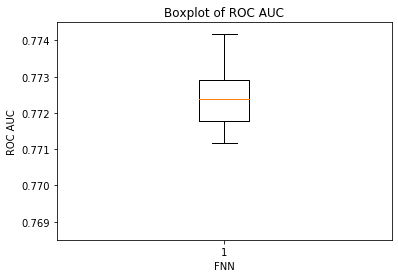

In [11]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(roc_auc)

# set axis labels and title
ax.set_ylabel('ROC AUC')
ax.set_xlabel('FNN')
ax.set_title('Boxplot of ROC AUC')
ax.set_ylim(0.7685,0.7745)

In [12]:
# # Plot precision recall curve
# from sklearn.metrics import average_precision_score

# y_true = df['True_Val']
# y_score = df['Predicted']

# # calculate the precision-recall curve
# precision, recall, _ = precision_recall_curve(y_true, y_score)

# # plot the precision-recall curve
# plt.step(recall, precision, color='b', alpha=0.2, where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('Precision-Recall Curve')
# plt.show()

# AUC = average_precision_score(y_true, y_score)   #0.793, pretty similar to roc AUC
# print(AUC)

In [13]:
with h5py.File('MLP_run1_training_data.h5', 'r') as hf:
    history_df_run1 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run2_training_data.h5', 'r') as hf:
    history_df_run2 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run3_training_data.h5', 'r') as hf:
    history_df_run3 = pd.DataFrame(hf['df'][:])

with h5py.File('MLP_run4_training_data.h5', 'r') as hf:
    history_df_run4 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run5_training_data.h5', 'r') as hf:
    history_df_run5 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run6_training_data.h5', 'r') as hf:
    history_df_run6 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run7_training_data.h5', 'r') as hf:
    history_df_run7 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run8_training_data.h5', 'r') as hf:
    history_df_run8 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run9_training_data.h5', 'r') as hf:
    history_df_run9 = pd.DataFrame(hf['df'][:])
    
with h5py.File('MLP_run10_training_data.h5', 'r') as hf:
    history_df_run10 = pd.DataFrame(hf['df'][:])
    


array([0.70323718, 0.70334071, 0.70359892, 0.70359325, 0.70340598,
       0.7031464 , 0.70387131, 0.70360887, 0.70320171, 0.70381033])

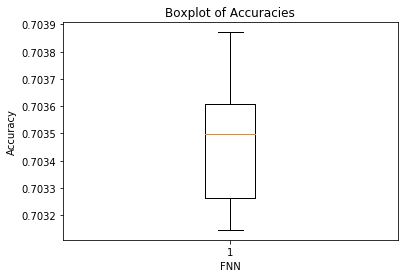

In [14]:
columns = ['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy']

history_df_run1 =history_df_run1.rename(columns=dict(zip(history_df_run1, columns)))
history_df_run2 =history_df_run2.rename(columns=dict(zip(history_df_run2, columns)))
history_df_run3 =history_df_run3.rename(columns=dict(zip(history_df_run3, columns)))
history_df_run4 =history_df_run4.rename(columns=dict(zip(history_df_run4, columns)))
history_df_run5 =history_df_run5.rename(columns=dict(zip(history_df_run5, columns)))
history_df_run6 =history_df_run6.rename(columns=dict(zip(history_df_run6, columns)))
history_df_run7 =history_df_run7.rename(columns=dict(zip(history_df_run7, columns)))
history_df_run8 =history_df_run8.rename(columns=dict(zip(history_df_run8, columns)))
history_df_run9 =history_df_run9.rename(columns=dict(zip(history_df_run9, columns)))
history_df_run10 =history_df_run10.rename(columns=dict(zip(history_df_run10, columns)))

acc1 = max(history_df_run1['binary_accuracy'])
acc2 = max(history_df_run2['binary_accuracy'])
acc3 = max(history_df_run3['binary_accuracy'])
acc4 = max(history_df_run4['binary_accuracy'])
acc5 = max(history_df_run5['binary_accuracy'])
acc6 = max(history_df_run6['binary_accuracy'])
acc7 = max(history_df_run7['binary_accuracy'])
acc8 = max(history_df_run8['binary_accuracy'])
acc9 = max(history_df_run9['binary_accuracy'])
acc10 = max(history_df_run10['binary_accuracy'])

acc_array = np.array((acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10))

# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(acc_array,showfliers=False)

# set axis labels and title
ax.set_xlabel('FNN')
ax.set_ylabel('Accuracy')
ax.set_title('Boxplot of Accuracies')
#ax.set_ylim(0.7685,0.7745)

acc_array

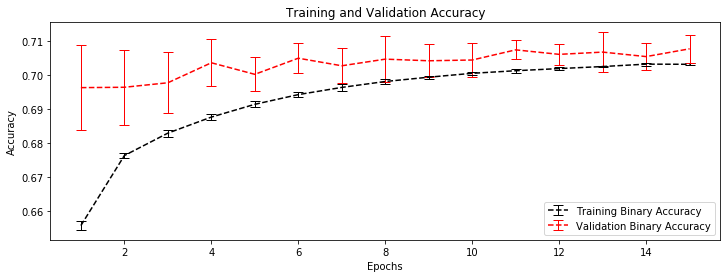

In [16]:

# Combine all the data into a single array
binary_acc = np.array([history_df_run1['binary_accuracy'],
                       history_df_run2['binary_accuracy'],
                       history_df_run3['binary_accuracy'],
                       history_df_run4['binary_accuracy'],
                       history_df_run5['binary_accuracy'],
                       history_df_run6['binary_accuracy'],
                       history_df_run7['binary_accuracy'],
                       history_df_run8['binary_accuracy'],
                       history_df_run9['binary_accuracy'],
                       history_df_run10['binary_accuracy']])

val_binary_acc = np.array([history_df_run1['val_binary_accuracy'],
                           history_df_run2['val_binary_accuracy'],
                           history_df_run3['val_binary_accuracy'],
                           history_df_run4['val_binary_accuracy'],
                           history_df_run5['val_binary_accuracy'],
                           history_df_run6['val_binary_accuracy'],
                           history_df_run7['val_binary_accuracy'],
                           history_df_run8['val_binary_accuracy'],
                           history_df_run9['val_binary_accuracy'],
                           history_df_run10['val_binary_accuracy']])

# Calculate the mean and standard deviation for each array
binary_acc_mean = np.mean(binary_acc, axis=0)
binary_acc_std = np.std(binary_acc, axis=0)

val_binary_acc_mean = np.mean(val_binary_acc, axis=0)
val_binary_acc_std = np.std(val_binary_acc, axis=0)

fig, ax = plt.subplots(figsize=(12, 4))
epochs = np.arange(1, len(binary_acc_mean)+1)

# Set the colors
error_bar_color = 'red'
cap_top_color = 'black'
cap_bottom_color = 'black'

# Plot the mean values with error bars
ax.errorbar(epochs, binary_acc_mean, yerr=binary_acc_std, label='Training Binary Accuracy', #ecolor='black',
             capsize=5, capthick=1, elinewidth=1, color = 'black', linestyle='--')
ax.errorbar(epochs, val_binary_acc_mean, yerr=val_binary_acc_std, label='Validation Binary Accuracy', #ecolor='red',
              capsize=5, capthick=1, elinewidth=1, color = 'red', linestyle='--', markeredgecolor='red')

# Set the color of the top and bottom caps
#for errorbar in ax.lines:
#    errorbar.set_markeredgecolor(cap_top_color)

# Add labels and legend
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy')
ax.legend()

# Show the plot
plt.show()


In [17]:
# Save the arrays to an HDF5 file
#with h5py.File('accuracy_FNN.h5', 'w') as hf:
#    hf.create_dataset('binary_acc', data=binary_acc)
 #   hf.create_dataset('val_binary_acc', data=val_binary_acc)


In [18]:
print(binary_acc_mean[-1])
print(binary_acc_std[-1])

0.7032387256622314
0.00027083728166727


In [19]:
np.std(val_binary_acc[0,:])

0.007763726487311909

# Signifances

In [20]:
with h5py.File('sig_data_run1.h5', 'r') as hf:
    sig_df_run1 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run2.h5', 'r') as hf:
    sig_df_run2 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run3.h5', 'r') as hf:
    sig_df_run3 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run4.h5', 'r') as hf:
    sig_df_run4 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run5.h5', 'r') as hf:
    sig_df_run5 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run6.h5', 'r') as hf:
    sig_df_run6 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run7.h5', 'r') as hf:
    sig_df_run7 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run8.h5', 'r') as hf:
    sig_df_run8 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run9.h5', 'r') as hf:
    sig_df_run9 = pd.DataFrame(hf['df'][:])
with h5py.File('sig_data_run10.h5', 'r') as hf:
    sig_df_run10 = pd.DataFrame(hf['df'][:])


In [21]:
columns = ['syst_uncertainty (%)', 'Significances', 'Threshold', 'no_bg', 'no_signal']

sig_df_run1 =sig_df_run1.rename(columns=dict(zip(sig_df_run1, columns)))
sig_df_run2 =sig_df_run2.rename(columns=dict(zip(sig_df_run2, columns)))
sig_df_run3 =sig_df_run3.rename(columns=dict(zip(sig_df_run3, columns)))
sig_df_run4 =sig_df_run4.rename(columns=dict(zip(sig_df_run4, columns)))
sig_df_run5 =sig_df_run5.rename(columns=dict(zip(sig_df_run5, columns)))
sig_df_run6 =sig_df_run6.rename(columns=dict(zip(sig_df_run6, columns)))
sig_df_run7 =sig_df_run7.rename(columns=dict(zip(sig_df_run7, columns)))
sig_df_run8 =sig_df_run8.rename(columns=dict(zip(sig_df_run8, columns)))
sig_df_run9 =sig_df_run9.rename(columns=dict(zip(sig_df_run9, columns)))
sig_df_run10 =sig_df_run10.rename(columns=dict(zip(sig_df_run10, columns)))

no_syst_1 = sig_df_run1['Significances'][0]
syst_5_1 =  sig_df_run1['Significances'][1]
syst_10_1 = sig_df_run1['Significances'][2]

no_syst_2 = sig_df_run2['Significances'][0]
syst_5_2 =  sig_df_run2['Significances'][1]
syst_10_2 = sig_df_run2['Significances'][2]

no_syst_3 = sig_df_run3['Significances'][0]
syst_5_3 =  sig_df_run3['Significances'][1]
syst_10_3 = sig_df_run3['Significances'][2]

no_syst_4 = sig_df_run4['Significances'][0]
syst_5_4 =  sig_df_run4['Significances'][1]
syst_10_4 = sig_df_run4['Significances'][2]

no_syst_5 = sig_df_run5['Significances'][0]
syst_5_5 =  sig_df_run5['Significances'][1]
syst_10_5 = sig_df_run5['Significances'][2]

no_syst_6 = sig_df_run6['Significances'][0]
syst_5_6 =  sig_df_run6['Significances'][1]
syst_10_6 = sig_df_run6['Significances'][2]

no_syst_7 = sig_df_run7['Significances'][0]
syst_5_7 =  sig_df_run7['Significances'][1]
syst_10_7 = sig_df_run7['Significances'][2]

no_syst_8 = sig_df_run8['Significances'][0]
syst_5_8 =  sig_df_run8['Significances'][1]
syst_10_8 = sig_df_run8['Significances'][2]

no_syst_9 = sig_df_run9['Significances'][0]
syst_5_9 =  sig_df_run9['Significances'][1]
syst_10_9 = sig_df_run9['Significances'][2]

no_syst_10 = sig_df_run10['Significances'][0]
syst_5_10 =  sig_df_run10['Significances'][1]
syst_10_10 = sig_df_run10['Significances'][2]

no_syst = [no_syst_1,no_syst_2,no_syst_3,no_syst_4,no_syst_5,no_syst_6,no_syst_7,no_syst_8,no_syst_9,no_syst_10]
syst_5 = [syst_5_1,syst_5_2,syst_5_3,syst_5_4,syst_5_5,syst_5_6,syst_5_7,syst_5_8,syst_5_9,syst_5_10]
syst_10 = [syst_10_1,syst_10_2,syst_10_3,syst_10_4,syst_10_5,syst_10_6,syst_10_7,syst_10_8,syst_10_9,syst_10_10]

Text(0.5, 1.0, 'Boxplot of Significance with no systematic uncertainty')

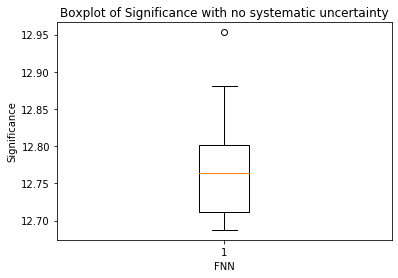

In [22]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(no_syst)

# set axis labels and title
ax.set_ylabel('Significance')
ax.set_xlabel('FNN')
ax.set_title('Boxplot of Significance with no systematic uncertainty')

Text(0.5, 1.0, 'Boxplot of Significance with 5% uncertainty')

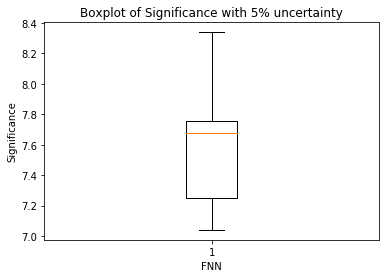

In [23]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(syst_5, sym='', whis=1.5)#showfliers=False)#flierprops={'marker': 'o', 'markersize': 8, 'linestyle': '-'})

# set axis labels and title
ax.set_ylabel('Significance')
ax.set_xlabel('FNN')
ax.set_title('Boxplot of Significance with 5% uncertainty')

Text(0.5, 1.0, 'Boxplot of Significance with 10% uncertainty')

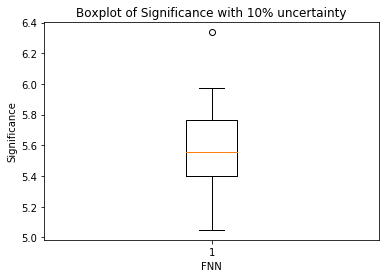

In [24]:
# create a figure and axis object
fig, ax = plt.subplots()

# create a boxplot of the data in roc_auc
ax.boxplot(syst_10)

# set axis labels and title
ax.set_ylabel('Significance')
ax.set_xlabel('FNN')
ax.set_title('Boxplot of Significance with 10% uncertainty')

In [84]:
np.array(syst_5)[optimal_threshold_mask]
np.mean(np.array(syst_5)[optimal_threshold_mask])
np.std(np.array(syst_5)[optimal_threshold_mask])

0.39820411911849857

In [76]:
no_syst_mean = np.mean(no_syst)
no_syst_std = np.std(no_syst)

syst_5_mean = np.mean(syst_5)
syst_5_std = np.std(syst_5)

syst_10_mean = np.mean(syst_10)
syst_10_std = np.std(syst_10)

print(f'No systematic uncertainty, significance: {no_syst_mean} +- {no_syst_std}')
print()
print(f'5% systematic uncertainty, significance: {syst_5_mean} +- {syst_5_std}')
print()
print(f'10% systematic uncertainty, significance: {syst_10_mean} +- {syst_10_std}')

No systematic uncertainty, significance: 12.77693911447153 +- 0.08016873243763825

5% systematic uncertainty, significance: 7.595552503493417 +- 0.38258304455791525

10% systematic uncertainty, significance: 5.612304560560352 +- 0.3400747466634423


In [55]:
# Combine all the data into a single array
no_bg_events = np.array([sig_df_run1['no_bg'],
                       sig_df_run2['no_bg'],
                       sig_df_run3['no_bg'],
                       sig_df_run4['no_bg'],
                       sig_df_run5['no_bg'],
                       sig_df_run6['no_bg'],
                       sig_df_run7['no_bg'],
                       sig_df_run8['no_bg'],
                       sig_df_run9['no_bg'],
                       sig_df_run10['no_bg']])

no_signal_events = np.array([sig_df_run1['no_signal'],
                           sig_df_run2['no_signal'],
                           sig_df_run3['no_signal'],
                           sig_df_run4['no_signal'],
                           sig_df_run5['no_signal'],
                           sig_df_run6['no_signal'],
                           sig_df_run7['no_signal'],
                           sig_df_run8['no_signal'],
                           sig_df_run9['no_signal'],
                           sig_df_run10['no_signal']])

# only include values if the threshold is 0.95, this was the median threshold, true for 7/10 (70%) models
optimal_threshold_mask = optimal_thresholds[:,1] == 0.95

# Calculate the mean and standard deviation for each array, at peak significance
no_bg_events_mean = np.mean(no_bg_events[optimal_threshold_mask], axis=0)
no_bg_events_std = np.std(no_bg_events[optimal_threshold_mask], axis=0)

no_signal_events_mean = np.mean(no_signal_events[optimal_threshold_mask], axis=0)
no_signal_events_std = np.std(no_signal_events[optimal_threshold_mask], axis=0)

print(f'Mean number of bg events = {no_bg_events_mean}')
print(f'Std on number of bg events = {no_bg_events_std}')
print()
print(f'Mean number of signal events = {no_signal_events_mean}')
print(f'Std on number of signal events = {no_signal_events_std}')

Mean number of bg events = [9923.5625     228.478125    99.5703125]
Std on number of bg events = [3069.13333379   64.02812767   52.21850606]

Mean number of signal events = [1282.59106445  163.51142578   93.60644531]
Std on number of signal events = [207.43340589  28.05468407  32.92643217]


In [56]:
# Combine all the data into a single array
optimal_thresholds = np.array([sig_df_run1['Threshold'],
                       sig_df_run2['Threshold'],
                       sig_df_run3['Threshold'],
                       sig_df_run4['Threshold'],
                       sig_df_run5['Threshold'],
                       sig_df_run6['Threshold'],
                       sig_df_run7['Threshold'],
                       sig_df_run8['Threshold'],
                       sig_df_run9['Threshold'],
                       sig_df_run10['Threshold']])

# Calculate the mean and standard deviation for each array, of peak significance
optimal_thresholds_mean = np.mean(optimal_thresholds, axis=0)
optimal_thresholds_std = np.std(optimal_thresholds, axis=0)

In [67]:
optimal_thresholds_mean

array([0.762, 0.949, 0.963])

# Save all data to make combine graphs

In [ ]:
data = {'ROC_Vals': roc_auc, 'Accuracy_Vals': acc_array, 'Significance_Vals_0': no_syst,
       'Significance_Vals_5': syst_5, 'Significance_Vals_10': syst_10}
df = pd.DataFrame(data)


# Save the DataFrame to an HDF5 file
#with h5py.File('MLP_data.h5', 'w') as hf:
#    hf.create_dataset('df', data=df)
    
# with h5py.File('run1_ROC_data.h5', 'r') as hf:
#     df = pd.DataFrame(hf['df'][:])


In [ ]:
data = {'ROC_Vals': roc_auc, 'Accuracy_Vals': acc_array, 'Significance_Vals_0': no_syst,
       'Significance_Vals_5': syst_5, 'Significance_Vals_10': syst_10}
df = pd.DataFrame(data)

df

#Index(['ROC_Vals', 'Accuracy_Vals', 'Significance_Vals_0',
      # 'Significance_Vals_5', 'Significance_Vals_10'],
      #dtype='object')